# Draw Confusion Matrix
draw confusion martrix from saved .pt file.  
Notice: you should change the gait_cycle, sampling, and pref_path keyword first, then run all cells.

In [1]:
# dict for title/res path pair 
# running on pegasus
# 2025-06027 first run

pegasus = {
	"add":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_add_5/2025-06-27/10-34-53/best_preds",
	"mul":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_mul_5/2025-06-27/10-34-54/best_preds",
	"concat":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_concat_5/2025-06-27/10-34-54/best_preds",
	"avg":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_avg_5/2025-06-27/10-34-54/best_preds",
	"late":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_late_5/2025-06-27/10-34-54/best_preds",
	"none":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_none_5/2025-06-27/10-34-54/best_preds",
}



****************************************************************************************************
pegasus, add
fold: 5
****************************************************************************************************
add
accuracy: tensor(0.7135)
precision: tensor(0.7551)
recall: tensor(0.7135)
f1_score: tensor(0.7112)
aurroc: tensor(0.8274)
_confusion_matrix: tensor([[0.8490, 0.0540, 0.0970],
        [0.2997, 0.6235, 0.0768],
        [0.3139, 0.0180, 0.6681]])
####################################################################################################


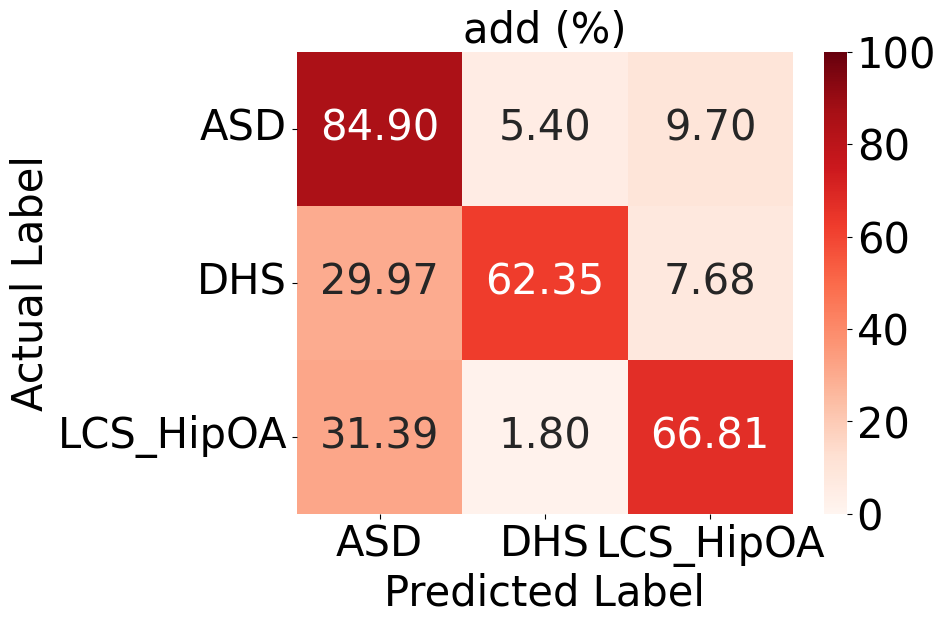

****************************************************************************************************
pegasus, mul
fold: 6
****************************************************************************************************
mul
accuracy: tensor(0.4953)
precision: tensor(0.6323)
recall: tensor(0.4953)
f1_score: tensor(0.4736)
aurroc: tensor(0.7382)
_confusion_matrix: tensor([[0.6695, 0.0047, 0.3258],
        [0.4364, 0.2134, 0.3501],
        [0.3912, 0.0058, 0.6029]])
####################################################################################################


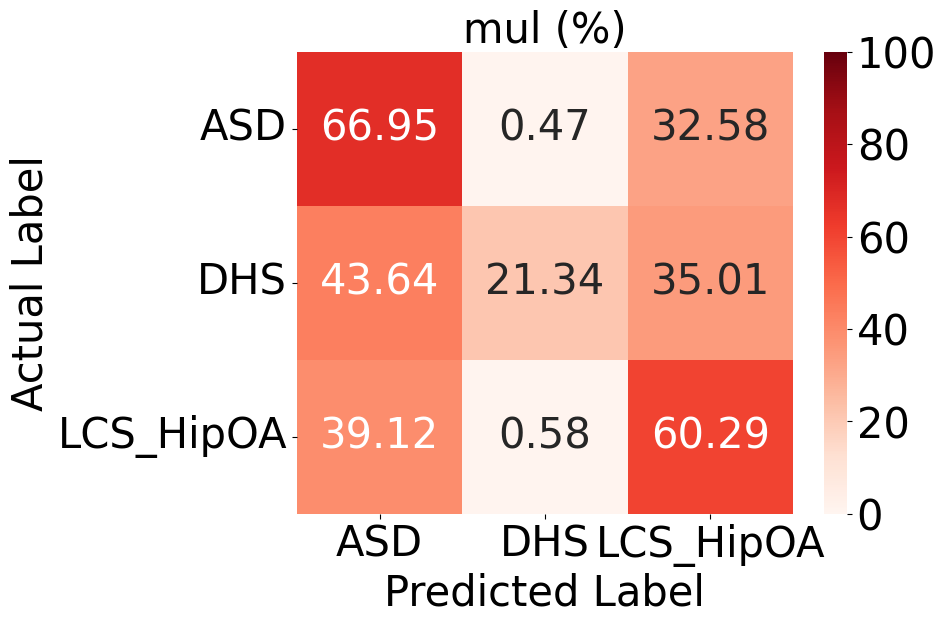

****************************************************************************************************
pegasus, concat
fold: 6
****************************************************************************************************
concat
accuracy: tensor(0.6282)
precision: tensor(0.6588)
recall: tensor(0.6282)
f1_score: tensor(0.5976)
aurroc: tensor(0.7534)
_confusion_matrix: tensor([[0.8764, 0.0761, 0.0475],
        [0.3269, 0.5834, 0.0897],
        [0.4549, 0.1203, 0.4248]])
####################################################################################################


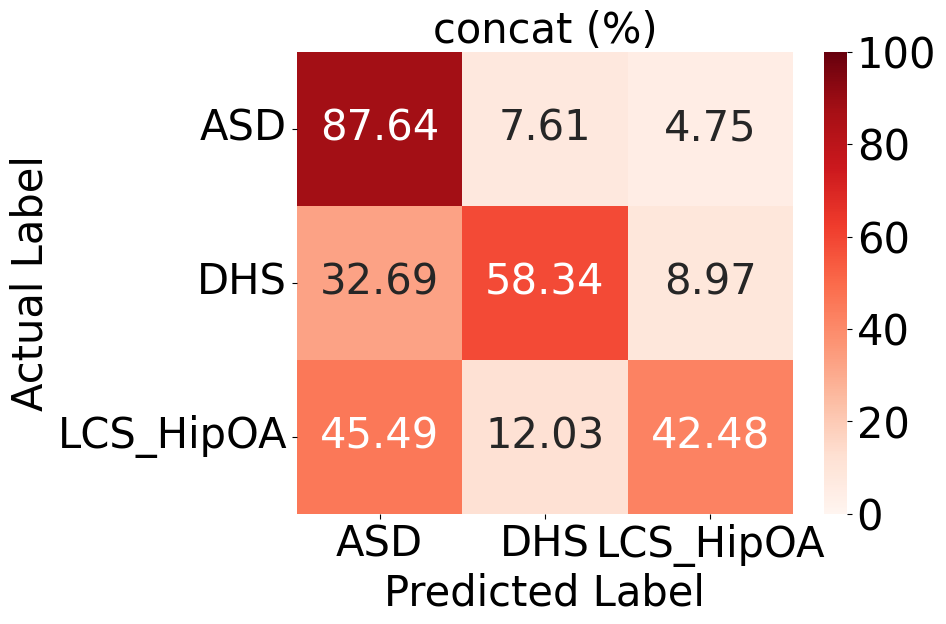

****************************************************************************************************
pegasus, avg
fold: 4
****************************************************************************************************
avg
accuracy: tensor(0.6502)
precision: tensor(0.6363)
recall: tensor(0.6502)
f1_score: tensor(0.6297)
aurroc: tensor(0.8222)
_confusion_matrix: tensor([[0.7178, 0.0581, 0.2241],
        [0.2206, 0.7059, 0.0735],
        [0.2805, 0.1923, 0.5271]])
####################################################################################################


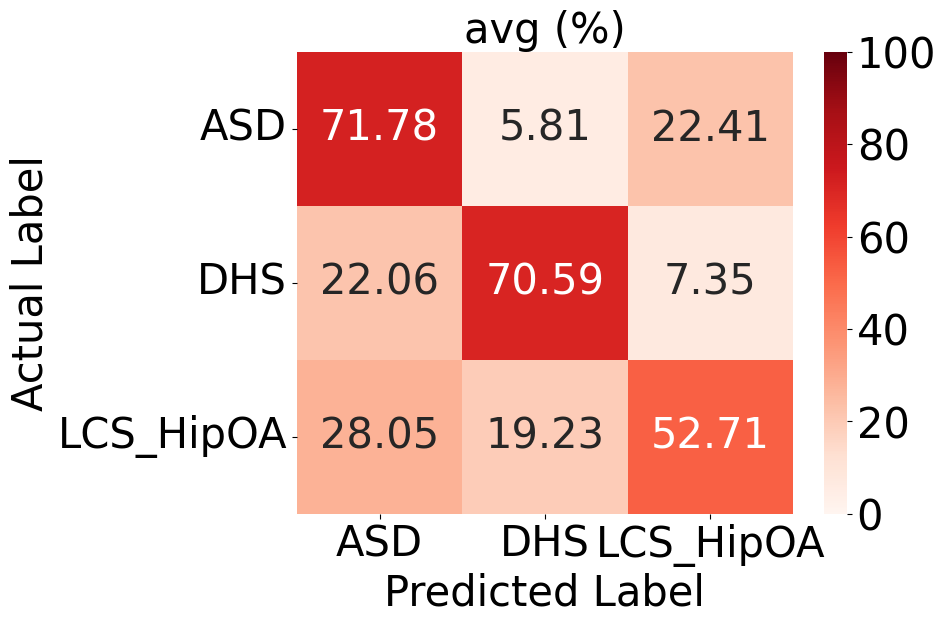

****************************************************************************************************
pegasus, late
fold: 5
****************************************************************************************************
late
accuracy: tensor(0.6118)
precision: tensor(0.6646)
recall: tensor(0.6118)
f1_score: tensor(0.5866)
aurroc: tensor(0.7784)
_confusion_matrix: tensor([[0.8582, 0.0430, 0.0988],
        [0.4015, 0.5894, 0.0091],
        [0.4802, 0.1321, 0.3877]])
####################################################################################################


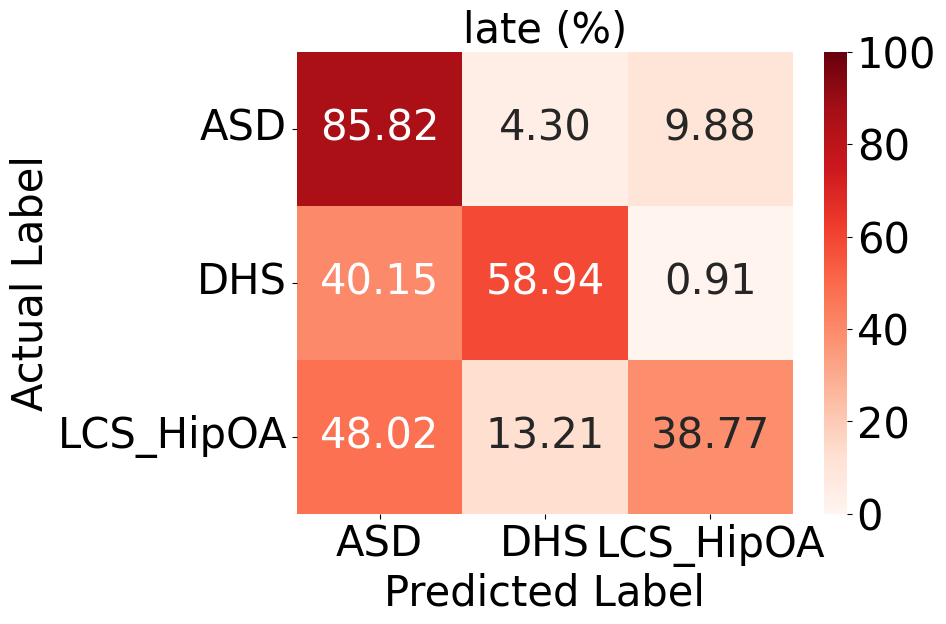

****************************************************************************************************
pegasus, none
fold: 4
****************************************************************************************************
none
accuracy: tensor(0.6046)
precision: tensor(0.6418)
recall: tensor(0.6046)
f1_score: tensor(0.5866)
aurroc: tensor(0.7862)
_confusion_matrix: tensor([[0.7500, 0.0430, 0.2070],
        [0.3156, 0.6309, 0.0535],
        [0.4943, 0.0727, 0.4330]])
####################################################################################################


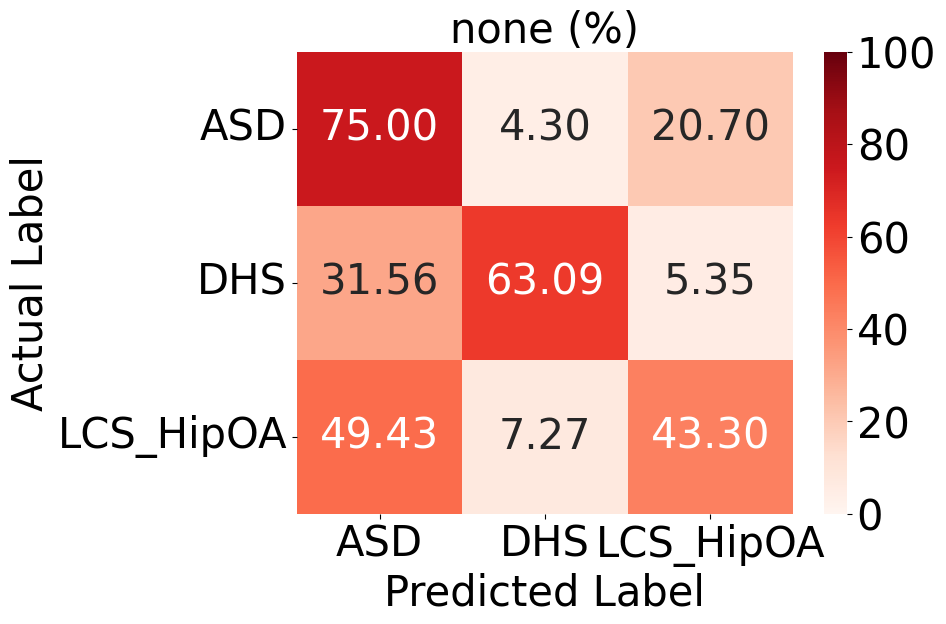

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch 
from pathlib import Path

from torchmetrics.classification import (
MulticlassAccuracy,
MulticlassPrecision,
MulticlassRecall,
MulticlassF1Score,
MulticlassConfusionMatrix,
MulticlassAUROC,
)

# analysis with title/res path pair

def analysis_with_title_res_path_pair(pair: dict, flag: str = "with_attn_loss"):

	for title, res_path in pair.items():
		
		fold = 0
		print('*' * 100)
		print(f"{flag}, {title}")
		all_label = []
		all_pred = []
		
		fold = int(len(list(Path(res_path).iterdir())) / 2 )

		print(f"fold: {fold}")

		for i in range(fold):
			label = torch.load(f"{res_path}/{i}_label.pt", map_location="cpu").to(torch.int)
			pred = torch.load(f"{res_path}/{i}_pred.pt", map_location="cpu")
			all_label.append(label)
			all_pred.append(pred)

		all_label = torch.cat(all_label, dim=0)
		all_pred = torch.cat(all_pred, dim=0)
		
		print('*' * 100)
		print(title)
		confusion_matrix_data = metrics(all_pred, all_label, num_class=3)
		print('#' * 100)

		plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})
		axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

		# draw confusion matrix
		plt.figure(figsize=(8, 6))
		sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
		# plt.title(f'{title} (%)', fontsize=30)
		plt.title(f"{title} (%)", fontsize=30)
		plt.ylabel('Actual Label', fontsize=30)
		plt.xlabel('Predicted Label', fontsize=30)
		plt.show()
    	

def metrics(all_pred: torch.Tensor, all_label: torch.Tensor, num_class: int = 3):

	# define metrics 
	_accuracy = MulticlassAccuracy(num_class)
	_precision = MulticlassPrecision(num_class)
	_recall = MulticlassRecall(num_class)
	_f1_score = MulticlassF1Score(num_class)
	_auroc = MulticlassAUROC(num_class)
	_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")

	print('accuracy: %s' % _accuracy(all_pred, all_label))
	print('precision: %s' % _precision(all_pred, all_label))
	print('recall: %s' % _recall(all_pred, all_label))
	print('f1_score: %s' % _f1_score(all_pred, all_label))
	print('aurroc: %s' % _auroc(all_pred, all_label))
	print('_confusion_matrix: %s' % _confusion_matrix(all_pred, all_label))

	return _confusion_matrix(all_pred, all_label).cpu().numpy() * 100

analysis_with_title_res_path_pair(pegasus, flag="pegasus")